# Mini-Projet Groupe 0

* Lidao Alouda
* Manoel Malaury Toussi

In [22]:
!pip install seaborn

In [7]:
import pandas as pd

In [23]:
import altair as alt
import seaborn as sns
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

In [10]:
baby_names_df = pd.read_csv("dpt2020.csv", sep=";")
baby_names_df.head()

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9


In [12]:
# Supprime les entrées agrégées '_PRENOMS_RARES' pour affiner l'analyse des prénoms individuels.
baby_names_df.drop(baby_names_df[baby_names_df.preusuel == '_PRENOMS_RARES'].index, inplace=True)

In [13]:
# Supprime les entrées du département inconnu/étranger ('XX') pour se concentrer sur les départements français.
baby_names_df.drop(baby_names_df[baby_names_df.dpt == 'XX'].index, inplace=True)

In [14]:
baby_names_df.sample(10)

,sexe,preusuel,annais,dpt,nombre
994740,1,LÉVI,2017,59,3
1576660,1,THIBAULT,1984,51,13
795283,1,JEAN-CLAUDE,1972,59,51
538163,1,FLORENT,2000,89,5
3426811,2,RACHIDA,1985,83,3
1193911,1,MICHAEL,1985,972,10
1609161,1,TOMMY,2007,69,3
1049638,1,LUCIEN,1915,43,12
1774283,2,ALANA,2019,78,3
467163,1,ERIC,1986,12,4


Most Popular Name by region in One year

In [15]:
baby_names_df['annais'] = pd.to_numeric(baby_names_df['annais'])
baby_names_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3668274 entries, 10885 to 3727550
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   sexe      int64 
 1   preusuel  object
 2   annais    int64 
 3   dpt       object
 4   nombre    int64 
dtypes: int64(3), object(2)
memory usage: 167.9+ MB


In [16]:
baby_names_specific_year = baby_names_df[(baby_names_df['annais'] == 2003) & (baby_names_df['dpt'] == '06')]
name_count = baby_names_specific_year.groupby(['preusuel', 'annais', 'dpt'])['nombre'].sum().sort_values(ascending=False)
top_name =name_count.head(15)

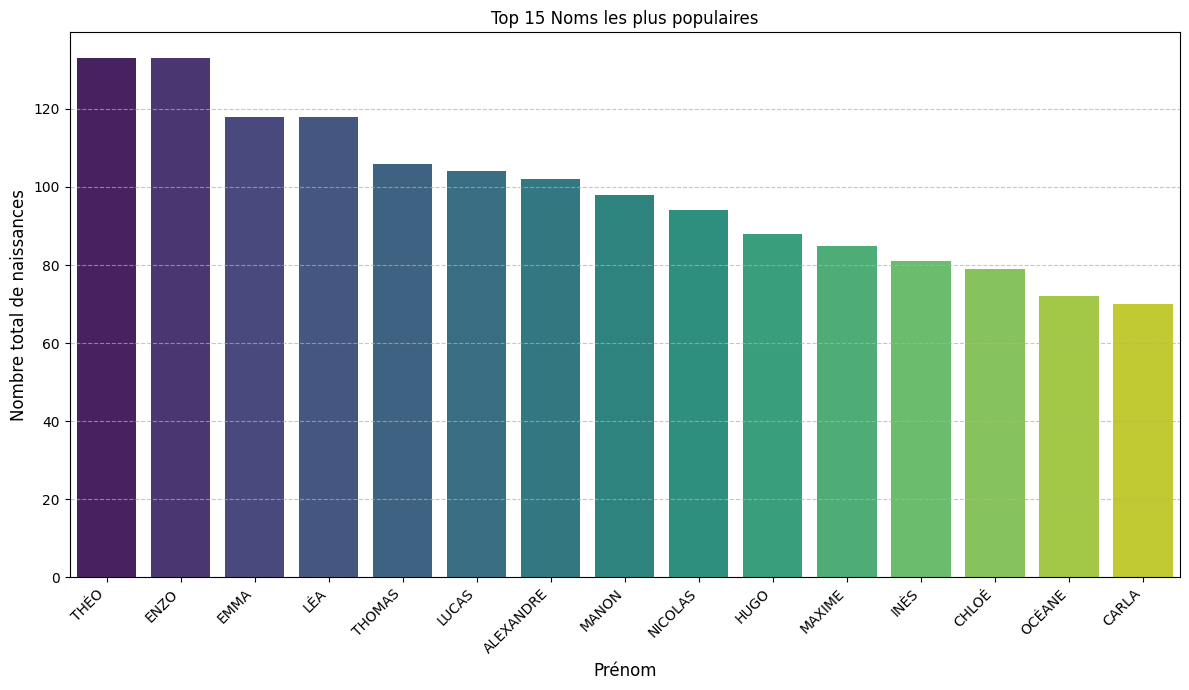

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.barplot(x=top_name.index.get_level_values('preusuel'), y=top_name.values, hue=top_name.index.get_level_values('preusuel'), legend=False, palette='viridis')

plt.title(f'Top 15 Noms les plus populaires')
plt.xlabel('Prénom', fontsize=12)
plt.ylabel('Nombre total de naissances', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
baby_names_df.sample(15)

,sexe,preusuel,annais,dpt,nombre
801405,1,JEAN-GUY,1950,22,3
1726497,1,ZAKARIA,1993,37,4
123862,1,ANDREAS,1996,78,3
2895459,2,LOU-ANN,2013,62,3
2624271,2,ISABELLE,1920,35,3
1415047,1,RENAUD,1981,16,3
723307,1,IBRAHIM,2008,38,5
3568652,2,SOLANGE,1955,47,9
2387852,2,ENORA,2014,83,11
2406770,2,EULALIE,1969,974,3


In [26]:
!wget https://france-geojson.gregoiredavid.fr/repo/departements.geojson
# !wget -O france.geojson https://www.data.gouv.fr/fr/datasets/r/00c0c560-3ad1-4a62-9a29-c34c98c3701e 


'wget' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [27]:
import geopandas as gpd

# france_gdf = gpd.read_file('france.geojson')
france_gdf = gpd.read_file('departements.geojson')
france_gdf.head()

,code,nom,geometry
0,02,Aisne,"POLYGON ((3.1727 50.012, 3.1822 50.01234, 3.21..."
1,10,Aube,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
2,14,Calvados,"POLYGON ((-1.11962 49.35557, -1.11503 49.3624,..."
3,15,Cantal,"POLYGON ((2.50841 45.4785, 2.52444 45.4807, 2...."
4,28,Eure-et-Loir,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."


In [28]:
base_map = alt.Chart(france_gdf).mark_geoshape(
    stroke='black', strokeWidth=0.5
).encode(
    tooltip=[
        alt.Tooltip('nom:N', title='Département'),
    ]
).properties(
    title='Carte de France',
    width=1200, 
    height=1000
)

base_map

alt.Chart(...)

In [29]:
baby_names_gdf = pd.merge(baby_names_df, france_gdf, left_on="dpt", right_on="code", how="right")
baby_names_gdf.sample(10)

,sexe,preusuel,annais,dpt,nombre,code,nom,geometry
1081178,1.0,VICTOR,2016.0,64,14.0,64,Pyrénées-Atlantiques,"POLYGON ((-0.24283 43.58498, -0.23503 43.58336..."
271829,2.0,EDA,2000.0,42,4.0,42,Loire,"POLYGON ((3.89954 46.27591, 3.90551 46.2716, 3..."
1261404,1.0,OSCAR,1930.0,75,6.0,75,Paris,"POLYGON ((2.31989 48.90046, 2.38515 48.90201, ..."
1021117,2.0,STÉPHANIE,1983.0,58,33.0,58,Nièvre,"POLYGON ((2.87463 47.52042, 2.8489 47.53754, 2..."
2625928,1.0,YANN,1985.0,18,5.0,18,Cher,"POLYGON ((2.23921 47.62098, 2.28623 47.62897, ..."
2263337,1.0,MORGAN,2012.0,74,10.0,74,Haute-Savoie,"POLYGON ((6.80252 45.77837, 6.78631 45.77149, ..."
3176488,2.0,LOUISE,1903.0,72,70.0,72,Sarthe,"POLYGON ((-0.05453 48.382, -0.05069 48.3752, -..."
728548,2.0,HALIMATOU,1986.0,93,4.0,93,Seine-Saint-Denis,"POLYGON ((2.55306 49.00982, 2.56579 49.0124, 2..."
257998,1.0,MUSTAPHA,1977.0,42,10.0,42,Loire,"POLYGON ((3.89954 46.27591, 3.90551 46.2716, 3..."
2454447,2.0,SARA,1997.0,94,19.0,94,Val-de-Marne,"POLYGON ((2.3319 48.81701, 2.36395 48.81631, 2..."


In [30]:
# Aggréger par année, département, sexe et nom
baby_names_dpt_trend = baby_names_gdf.groupby(['annais', 'dpt', 'sexe', 'preusuel'])['nombre'].sum().reset_index()
baby_names_dpt_trend.sample(10)

,annais,dpt,sexe,preusuel,nombre
1399878,1971.0,62,1.0,WILLIAM,23.0
189132,1911.0,25,2.0,ANGÈLE,15.0
680947,1939.0,76,2.0,AGNÈS,11.0
3144929,2014.0,84,2.0,MAXINE,3.0
2733603,2006.0,78,1.0,MERWAN,4.0
594777,1934.0,77,2.0,MARTHE,4.0
2311299,1997.0,26,1.0,JORDAN,13.0
23730,1901.0,48,2.0,BERTHE,17.0
44339,1902.0,69,2.0,ANDRÉA,7.0
42924,1902.0,62,2.0,CLARA,6.0


In [31]:
#le total de naissances par an, par département et par sexe
baby_names_dpt_trend['total_annee_dpt_sexe'] = baby_names_dpt_trend.groupby(['annais', 'dpt', 'sexe'])['nombre'].transform('sum')
baby_names_dpt_trend.sample(10)

,annais,dpt,sexe,preusuel,nombre,total_annee_dpt_sexe
1783442,1983.0,26,1.0,MOHAMED,23.0,2310.0
2611606,2004.0,29,2.0,MARIE,69.0,3873.0
672091,1939.0,34,1.0,JACKY,6.0,2435.0
1651054,1979.0,53,1.0,LAURENT,23.0,1855.0
1133829,1961.0,53,1.0,SYLVAIN,7.0,2278.0
3408071,2020.0,29,2.0,SARAH,4.0,2511.0
1021070,1956.0,70,2.0,PIERRETTE,8.0,1831.0
3187282,2015.0,74,1.0,THOMAS,37.0,4365.0
2076064,1991.0,12,1.0,SÉBASTIEN,9.0,1051.0
1805692,1983.0,83,1.0,HERVÉ,5.0,3700.0


In [32]:
# le pourcentage de popularité par nom, an, dpt, sexe
baby_names_dpt_trend['pourcentage'] = (baby_names_dpt_trend['nombre'] / baby_names_dpt_trend['total_annee_dpt_sexe']) * 100
baby_names_dpt_trend.sample(10)

,annais,dpt,sexe,preusuel,nombre,total_annee_dpt_sexe,pourcentage
593156,1934.0,71,2.0,ARLETTE,31.0,3523.0,0.879932
2517717,2002.0,18,1.0,CYRIL,3.0,1022.0,0.293542
3291439,2017.0,79,1.0,ULYSSE,3.0,907.0,0.330761
3335680,2018.0,75,1.0,TIMOTHÉE,81.0,17571.0,0.460987
1515906,1975.0,30,2.0,MARILYN,4.0,2222.0,0.180018
760267,1944.0,54,2.0,CLAUDINE,95.0,3860.0,2.461140
3194870,2015.0,84,1.0,ISMAÏL,6.0,3219.0,0.186393
1753363,1982.0,42,1.0,MATTHIEU,36.0,5556.0,0.647948
1409794,1971.0,89,2.0,LAURE,8.0,1819.0,0.439802
385210,1923.0,42,2.0,JEANNE,382.0,4388.0,8.705561


In [33]:
# les top N, calculer le rang par an, dpt, sexe
baby_names_dpt_trend['rank'] = baby_names_dpt_trend.groupby(['annais', 'dpt', 'sexe'])['nombre'].rank(method='first', ascending=False)
baby_names_dpt_trend.sample(10)

,annais,dpt,sexe,preusuel,nombre,total_annee_dpt_sexe,pourcentage,rank
347100,1921.0,32,1.0,CLÉMENT,4.0,1140.0,0.350877,57.0
1319442,1968.0,82,1.0,RICHARD,4.0,1197.0,0.334169,62.0
1877156,1985.0,81,1.0,MICKAEL,25.0,1668.0,1.498801,22.0
1815381,1984.0,14,1.0,DAVY,4.0,4380.0,0.091324,146.0
424146,1925.0,55,1.0,ADOLPHE,4.0,1738.0,0.230150,53.0
328536,1920.0,30,2.0,ADRIENNE,9.0,2740.0,0.328467,59.0
156387,1909.0,35,2.0,LÉA,20.0,4098.0,0.488043,50.0
1142568,1961.0,77,2.0,ISABELLE,167.0,3697.0,4.517176,3.0
1331569,1969.0,32,2.0,VÉRONIQUE,24.0,760.0,3.157895,8.0
498412,1929.0,57,1.0,THADEE,3.0,5465.0,0.054895,145.0


# Visualization 1: Evolution of Baby Names Over Time

## 1. Évolution des Noms les Plus Populaires au Niveau National

Description: Ce graphique révèle les tendances macro de popularité des prénoms à l'échelle nationale, identifiant les noms dominants et les phénomènes de mode à travers le temps. Il permet de visualiser les montées et descentes dans le classement, offrant une vue d'ensemble sur les dynamiques culturelles.

In [34]:
df_national_trend = baby_names_df.groupby(['annais', 'sexe', 'preusuel'])['nombre'].sum().reset_index()

# la part de chaque prénom par rapport au total national par année et sexe
df_national_trend['total_annee_sexe'] = df_national_trend.groupby(['annais', 'sexe'])['nombre'].transform('sum')
df_national_trend['pourcentage'] = (df_national_trend['nombre'] / df_national_trend['total_annee_sexe']) * 100

# le rang de popularité par année et sexe
df_national_trend['rank'] = df_national_trend.groupby(['annais', 'sexe'])['nombre'].rank(method='min', ascending=False)

df_national_trend.sample(10)

,annais,sexe,preusuel,nombre,total_annee_sexe,pourcentage,rank
215383,2011,2,FELICIE,10,274656,0.003641,1216.0
18048,1915,2,ELEONORE,66,168863,0.039085,156.0
239979,2017,1,BILLAL,3,276384,0.001085,1667.0
120899,1980,2,CHANTALE,3,348912,0.000860,956.0
230027,2014,2,NORAH,244,266796,0.091456,219.0
182896,2003,1,YOUENN,44,324308,0.013567,500.0
164177,1997,2,DOMINIQUE,8,292382,0.002736,900.0
132229,1985,1,SASA,3,357447,0.000839,885.0
207007,2009,2,KELYSSA,3,286209,0.001048,1619.0
76631,1958,2,FATIHA,70,387446,0.018067,242.0


In [35]:
N_TOP_NAMES_SIMPLIFIED = 15

def prepare_top_names_with_others(df, n_top=N_TOP_NAMES_SIMPLIFIED):
    df_ranked = df.copy()
    df_ranked['is_top'] = df_ranked['rank'] <= n_top

    # les top N noms
    df_top = df_ranked[df_ranked['is_top']].copy()

    df_others = df_ranked[~df_ranked['is_top']].groupby(['annais', 'sexe'])['nombre'].sum().reset_index()
    df_others['preusuel'] = 'Autres'

    df_total_per_year_sexe = df_ranked[['annais', 'sexe', 'total_annee_sexe']].drop_duplicates()
    df_others = pd.merge(df_others, df_total_per_year_sexe, on=['annais', 'sexe'], how='left')

    df_others['pourcentage'] = (df_others['nombre'] / df_others['total_annee_sexe']) * 100

    df_combined = pd.concat([df_top, df_others], ignore_index=True)
    return df_combined


df_top_national_names_simplified = prepare_top_names_with_others(df_national_trend, N_TOP_NAMES_SIMPLIFIED)
df_top_national_names_simplified.sample(10)


,annais,sexe,preusuel,nombre,total_annee_sexe,pourcentage,rank,is_top
1210,1940,1,MICHEL,16367,246418,6.641966,2.0,True
1222,1940,2,JEANNINE,5203,240527,2.163167,7.0,True
2339,1977,2,VIRGINIE,9642,326288,2.955058,4.0,True
1110,1937,1,ANDRÉ,12642,273385,4.624248,5.0,True
2044,1968,1,FABRICE,7413,417279,1.776509,15.0,True
2495,1983,1,DAVID,7593,348057,2.181539,5.0,True
2505,1983,2,AUDREY,7394,321603,2.299108,7.0,True
2677,1989,1,JONATHAN,6096,353627,1.723850,12.0,True
3293,2009,2,LOLA,4020,286209,1.404568,10.0,True
1411,1947,1,ANDRÉ,12024,445426,2.699438,11.0,True


In [36]:
sexe_dropdown_global = alt.binding_select(options=[1, 2], name='Sexe ', labels=['Masculin', 'Féminin'])
select_sexe_global = alt.selection_point(fields=['sexe'], bind=sexe_dropdown_global, value=1)


ordered_names = sorted(df_top_national_names_simplified['preusuel'].unique().tolist())
if 'Autres' in ordered_names:
    ordered_names.remove('Autres')
    ordered_names.append('Autres')

min_year = int(df_top_national_names_simplified['annais'].min())
max_year = int(df_top_national_names_simplified['annais'].max())

start_decade = (min_year // 10) * 10
end_decade = ((max_year + 9) // 10) * 10 


decade_years = list(range(start_decade, end_decade + 1, 10))

base_chart_not_faceted = alt.Chart(df_top_national_names_simplified).encode(
    x=alt.X('annais:O', title='Année', axis=alt.Axis(values=decade_years, format='d')),
    y=alt.Y('sum(pourcentage):Q', title='Pourcentage du total annuel', stack='normalize'),
    color=alt.Color('preusuel:N', title='Nom', sort=ordered_names, legend=alt.Legend(columns=2)),
    tooltip=[
        alt.Tooltip('annais:O', title='Année'),
        alt.Tooltip('preusuel:N', title='Nom'),
        alt.Tooltip('sum(nombre):Q', title='Total Naissances'),
        alt.Tooltip('sum(pourcentage):Q', title='Pourcentage', format='.2f')
    ]
).properties(
    title=f'Part des {N_TOP_NAMES_SIMPLIFIED} Noms les Plus Populaires au niveau National'
)

others_area = base_chart_not_faceted.transform_filter(
    alt.FieldEqualPredicate(field='preusuel', equal='Autres')
).mark_area(opacity=0.6).encode(
    order=alt.Order('preusuel', sort='descending')
)

top_names_lines = base_chart_not_faceted.transform_filter(
    alt.FieldOneOfPredicate(field='preusuel', oneOf=[name for name in ordered_names if name != 'Autres'])
).mark_line(point=True).encode(
    tooltip=[
        alt.Tooltip('annais:O', title='Année'),
        alt.Tooltip('preusuel:N', title='Nom'),
        alt.Tooltip('sum(nombre):Q', title='Total Naissances'),
        alt.Tooltip('sum(pourcentage):Q', title='Pourcentage', format='.2f')
    ]
)

combined_layers = alt.layer(others_area, top_names_lines).resolve_scale(
    y='shared'
)

final_chart_top_names = combined_layers.add_params(
    select_sexe_global
).transform_filter(
    select_sexe_global
).facet(
    column=alt.Column('sexe:N', header=alt.Header(titleOrient="bottom", labelOrient="bottom"), title='Sexe (1=M, 2=F)'),
    columns=2
).interactive()

final_chart_top_names

alt.FacetChart(...)

##### Forces :

* **Contexte de popularité relative :** Montre la part de marché de chaque prénom dans le total annuel, ce qui est crucial pour comprendre la popularité réelle au-delà du nombre brut de naissances.
* **Visualisation des phénomènes de masse :** Met en évidence l'emprise des noms les plus populaires sur le paysage nominal et comment cette "part" évolue.
* **Identification des plafonds :** Permet de voir si la popularité d'un nom atteint un plafond et si de nouveaux noms émergent pour prendre une part significative.
* **Comparaison directe des parts :** Facilite la comparaison de la proportion de naissances attribuée à chaque prénom dans le top 15 au fil du temps.

##### Faiblesses :

* **Encombrement visuel élevé :** Avec 15 lignes ou plus, le graphique peut être très dense et difficile à suivre, surtout là où les lignes se croisent fréquemment.
* **Détail des noms individuels difficile :** Il est ardu de lire la valeur exacte pour chaque prénom sur une année donnée sans survoler.
* **Interprétation complexe des intersections :** Les croisements de lignes peuvent être difficiles à déchiffrer et à attribuer à un prénom spécifique sans la légende.
* **Masque les noms moins populaires :** Par définition, il ne montre que les 15 premiers noms, ignorant les tendances des milliers d'autres prénoms.

## 2. Popularité d'un Nom Spécifique au Fil du Temps 

Description: Ce graphique permet d'explorer en détail l'évolution de la popularité d'un prénom sélectionné année après année, visualisant ses périodes de croissance, de déclin ou de stabilité. Il est idéal pour comprendre la trajectoire individuelle d'un nom et sa relation avec des événements spécifiques

In [37]:
name_selector = alt.binding_select(
    options=sorted(df_national_trend['preusuel'].unique().tolist()),
    name='Sélectionner un Nom'
)
selected_name = alt.selection_point(fields=['preusuel'], bind=name_selector, value='ABBIE') # Valeur par défaut


chart_name_trend = alt.Chart(df_national_trend).mark_line().encode(
    x=alt.X('annais:O', title='Année'),
    y=alt.Y('nombre:Q', title='Nombre de Naissances'),
    color=alt.Color('sexe:N', title='Sexe', scale=alt.Scale(domain=[1, 2], range=['blue', 'red']), legend=alt.Legend(title='Sexe', format='d')), # Couleur par sexe
    tooltip=['annais:O', 'preusuel:N', 'nombre:Q', 'sexe:N']
).properties(
    width=600,
    height=400,
    title='Évolution du Nombre de Naissances pour un Nom Sélectionné'
).add_params(
    selected_name
).transform_filter(
    selected_name
).interactive()

chart_name_trend

alt.Chart(...)

- améliorer la légende

### Forces :

* **Visualisation claire de la tendance individuelle :** Permet d'observer facilement l'évolution de la popularité d'un prénom unique au fil des années, identifiant les pics, les baisses et la stabilité.
* **Comparaison par sexe :** Si le nom est épicène, le graphique montre sa popularité pour les garçons et les filles sur la même période, facilitant la comparaison directe.
* **Identification des événements :** Les changements de popularité peuvent être liés à des événements culturels ou des modes.
* **Interactivité :** Le sélecteur de nom rend le graphique intuitif et utile pour l'exploration.

### Faiblesses :

* **Comparaison limitée entre noms :** Ne permet pas de comparer simultanément plusieurs prénoms sans changer la sélection.
* **Manque de contexte global :** N'indique pas la popularité relative du nom par rapport à l'ensemble des prénoms donnés dans une année.
* **Échelle variable :** L'axe Y s'adapte au nom sélectionné, rendant les comparaisons d'amplitude entre différents noms difficiles.
* **Données éparses :** Pour les prénoms rares, le graphique peut être "plat" ou montrer des trous, ce qui est moins informatif.

##Sketch 4

### Sketch 4

In [38]:
n_largest = 50
# Pre-aggregate the data to improve performance
agg_names = baby_names_df.groupby(['preusuel', 'sexe', 'annais'], as_index=False)['nombre'].sum()

# Convert 'annais' to integer
agg_names['annais'] = agg_names['annais'].astype(int)

# Interactive Bar Chart with Gender Filter
selection_gender = alt.selection_point(
    fields=['sexe'],
    bind=alt.binding_radio(options=[1, 2], labels=['Male', 'Female'], name='Gender'),
    name='Gender'
)

# Generate a list of years every 10 years
years_every_10 = list(range(agg_names['annais'].min(), agg_names['annais'].max() + 1, 10))

# Filtered Bar Chart
bar_chart = alt.Chart(agg_names).mark_bar().encode(
    x=alt.X(
        'annais:O',
        title='Year',
        axis=alt.Axis(values=years_every_10, labelAngle=-45)  # Show only every 10 years
    ),
    y=alt.Y('sum(nombre):Q', title='Total Count'),  # Aggregate 'nombre' for each year
    color=alt.Color('sexe:N', scale=alt.Scale(domain=[1, 2], range=['blue', 'pink']), legend=None),
    tooltip=['annais', 'preusuel', 'sum(nombre)']
).transform_filter(
    selection_gender  # Filter by selected gender
).properties(
    title='Baby Names by Year and Gender (Every 10 Years)',
    width=800,
    height=400
).add_params(
    selection_gender
)

bar_chart.display()

alt.Chart(...)

### **Forces**
1. **Optimisation des performances** :
   - La pré-agrégation des données (`agg_names`) réduit la charge computationnelle lors du rendu de la visualisation, améliorant les performances pour les grands ensembles de données.

2. **Filtrage interactif** :
   - L'utilisation de `alt.selection_point` avec des boutons radio permet aux utilisateurs de filtrer dynamiquement le graphique par genre, améliorant l'interactivité.

3. **Intervalles de temps lisibles** :
   - L'affichage des années par intervalles de 10 ans (`years_every_10`) simplifie l'axe des abscisses, rendant le graphique plus lisible et moins encombré.

---

### **Faiblesses**
1. **Options de genre limitées** :
   - Le filtre de genre suppose des valeurs binaires (1 pour homme, 2 pour femme), ce qui peut ne pas inclure les catégories non-binaires ou autres genres.

2. **Intervalles d'années statiques** :
   - L'intervalle fixe de 10 ans (`years_every_10`) peut ne pas convenir à tous les cas d'utilisation. Les utilisateurs ne peuvent pas ajuster dynamiquement la granularité de l'axe des abscisses.

3. **Absence de légende pour les couleurs** :
   - Bien que les couleurs soient intuitives, l'absence d'une légende pour le champ `sexe` pourrait dérouter les utilisateurs qui ne connaissent pas la correspondance des couleurs.

# Visualization 2: Regional Effect in Baby Name Popularity

## 1. Graphique des Noms les Plus Populaires par Année et Département

Description: Il explore la popularité des prénoms au niveau départemental, permettant d'analyser les tendances spécifiques à une région ou de comparer les préférences de noms entre différents départements sur des périodes données.

In [39]:
# les 10 noms les plus populaires par département, année et sexe pour la clarté
N_TOP_NAMES = 10
baby_names_dpt_top_names = baby_names_dpt_trend[baby_names_dpt_trend['rank'] <= N_TOP_NAMES]

# Créer un sélecteur d'année
year_slider = alt.binding_range(
    min=baby_names_df['annais'].min(),
    max=baby_names_df['annais'].max(),
    step=1,
    name='Année'
)
select_year = alt.selection_point(name="select_year", fields=['annais'], bind=year_slider, value=baby_names_df['annais'].max())

# un sélecteur de département pour permettre à l'utilisateur de choisir un ou plusieurs dpt
dpt_dropdown = alt.binding_select(options=sorted(baby_names_dpt_top_names['dpt'].unique().tolist()), name='Département ')
select_dpt = alt.selection_point(fields=['dpt'], bind=dpt_dropdown, value=baby_names_dpt_top_names['dpt'].unique()[0]) 

# Le graphique principal des barres
chart_bars = alt.Chart(baby_names_dpt_top_names).mark_bar().encode(
    y=alt.Y('preusuel:N', sort='-x', title='Nom'), # Trier par popularité
    x=alt.X('nombre:Q', title='Nombre de Naissances'),
    color=alt.Color('preusuel:N', title='Nom'),
    tooltip=['annais', 'dpt', 'sexe', 'preusuel', 'nombre', alt.Tooltip('pourcentage', format='.2f')]
).properties(
    title=f'Top {N_TOP_NAMES} Noms par Département et Année'
).add_params(
    select_year,
    select_dpt
).transform_filter(
    select_year
).transform_filter(
    select_dpt
).facet(
    column=alt.Column('sexe:N', header=alt.Header(titleOrient="bottom", labelOrient="bottom"), title='Sexe (1=M, 2=F)')
).interactive()

chart_bars

alt.FacetChart(...)

Améliorations
- remplacer les numéros par les noms des départements
- le groupement doit être par région

##### Forces :

* Permet une analyse détaillée des tendances des prénoms au niveau départemental.
* Idéal pour comparer la popularité des noms entre différents départements ou observer leur évolution dans une région spécifique sur l'année sélectionnée.
* Utilise des barres colorées pour distinguer les noms, facilitant l'identification des plus populaires par sexe dans le département choisi.

##### Faiblesses :

* Peut devenir visuellement encombré si de nombreux noms ou départements sont comparés simultanément.
* Nécessite de changer manuellement le département et l'année via les sélecteurs pour explorer différentes régions ou périodes.
* La comparaison directe entre les départements pour un même nom est moins intuitive qu'avec une carte.

## 2. Carte des Noms les Plus Populaires par Département et par Année

Description:  Elle révèle les effets régionaux de la popularité des prénoms en France, montrant la répartition géographique des noms les plus donnés. Elle permet d'identifier les disparités locales et de voir si les tendances nationales se reflètent uniformément sur le territoire.

In [40]:
# Filtrons pour le nom le plus populaire (rank = 1)
df_top_name_per_dpt = baby_names_dpt_trend[baby_names_dpt_trend['rank'] == 1]
df_top_name_per_dpt.sample(15)

,annais,dpt,sexe,preusuel,nombre,total_annee_dpt_sexe,pourcentage,rank
66353,1904.0,08,2.0,MARIE,310.0,1705.0,18.181818,1.0
1015338,1956.0,51,2.0,MARTINE,221.0,4056.0,5.448718,1.0
606454,1935.0,53,1.0,ANDRÉ,131.0,2107.0,6.217371,1.0
342930,1921.0,10,1.0,ANDRÉ,139.0,1485.0,9.360269,1.0
1306064,1968.0,40,2.0,SYLVIE,112.0,1508.0,7.427056,1.0
270249,1916.0,11,1.0,JEAN,46.0,576.0,7.986111,1.0
1476383,1973.0,95,1.0,CHRISTOPHE,318.0,5639.0,5.639298,1.0
91895,1905.0,58,1.0,LOUIS,121.0,1437.0,8.420320,1.0
2777481,2007.0,72,1.0,ENZO,78.0,2561.0,3.045685,1.0
3206748,2016.0,10,2.0,EMMA,25.0,806.0,3.101737,1.0


In [41]:
top_babyname_per_year_dept = france_gdf.merge(df_top_name_per_dpt, how='left', left_on='code', right_on='dpt')

year_slider_map = alt.binding_range(
    min=df_top_name_per_dpt['annais'].min(),
    max=df_top_name_per_dpt['annais'].max(),
    step=1,
    name='Année'
)
select_year_map = alt.selection_point(name="select_year_map", fields=['annais'], bind=year_slider_map, value=df_top_name_per_dpt['annais'].max())

# Sélection interactive du sexe
sexe_dropdown_map = alt.binding_select(options=[1, 2], name='Sexe ', labels=['Masculin', 'Féminin'])
select_sexe_map = alt.selection_point(fields=['sexe'], bind=sexe_dropdown_map, value=1)

colored_map = alt.Chart(top_babyname_per_year_dept).mark_geoshape(
    stroke='black', strokeWidth=0.5
).encode(
    color=alt.Color('nombre:Q', title='Nombre de Naissances', scale=alt.Scale(scheme='redyellowblue')),
    tooltip=[
        alt.Tooltip('nom:N', title='Département'),
        alt.Tooltip('preusuel:N', title='Nom le plus populaire'),
        alt.Tooltip('nombre:Q', title='Nombre de Naissances'),
        alt.Tooltip('pourcentage:Q', title='Pourcentage', format='.2f')
    ]
).transform_filter(
    select_year_map
).transform_filter(
    select_sexe_map
).properties(
    width=1100,
    height=900,
    title='Nom le plus populaire par département'
).add_params(
    select_year_map,
    select_sexe_map
)

colored_map

alt.Chart(...)

##### Forces :

* Fournit une représentation géographique claire des prénoms les plus populaires.
* Les info-bulles interactives offrent des informations détaillées.
* Met en évidence les variations régionales de manière efficace.

##### Faiblesses :

* Nécessite des connaissances géographiques pour être pleinement interprétée.
* Affiche uniquement le prénom le plus populaire, ce qui peut ne pas représenter les tendances générales en matière de noms.


In [53]:
depts = gpd.read_file('departements-version-simplifiee.geojson')

depts.sample(5)

,code,nom,geometry
47,47,Lot-et-Garonne,"POLYGON ((0.29733 44.76228, 0.32329 44.74762, ..."
35,35,Ille-et-Vilaine,"MULTIPOLYGON (((-2.12371 48.60441, -2.14142 48..."
8,09,Ariège,"POLYGON ((1.68842 43.27355, 1.70075 43.26054, ..."
38,38,Isère,"POLYGON ((5.62375 45.61327, 5.62303 45.60428, ..."
50,50,Manche,"POLYGON ((-1.11962 49.35557, -1.11346 49.32795..."


In [54]:
# Calculate the proportion of female names in each department
gender_proportion = baby_names_df.groupby(['dpt', 'sexe']).agg({'nombre': 'sum'}).reset_index()
gender_proportion = gender_proportion.pivot(index='dpt', columns='sexe', values='nombre').fillna(0)

# Rename columns to strings
gender_proportion.columns = gender_proportion.columns.map(str)

# Calculate the female ratio
gender_proportion['female_ratio'] = gender_proportion['2'] / (gender_proportion['1'] + gender_proportion['2'])

# Merge the proportion data with the department geometries
gender_map_data = depts.merge(gender_proportion, how='left', left_on='code', right_index=True)

# Create the choropleth map
gender_map = alt.Chart(gender_map_data).mark_geoshape(stroke='white').encode(
    color=alt.Color('female_ratio:Q', title='Female Name Ratio', scale=alt.Scale(scheme='redblue')),
    tooltip=['nom:N', 'female_ratio:Q']
).properties(
    width=800,
    height=600,
    title='Regions with Overrepresentation of Female Names'
).project('mercator')

gender_map.display()

alt.Chart(...)

### Strengths

## Geographical Insight:

The choropleth map provides a clear visual representation of the distribution of female name proportions across departments, making it easy to identify regional patterns.

## Data Aggregation:

Aggregating the data by department and gender ensures accurate calculations of proportions, reducing noise in the visualization.
Interactivity:

## Tooltips (tooltip=['nom:N', 'female_ratio:Q']) allow users to explore detailed information for each region, enhancing the usability of the map.

Weaknesses
Handling Missing Data:

Departments with missing data are filled with zeros (fillna(0)), which might lead to misleading interpretations, as zero could imply no data rather than no female names.
Color Scale Interpretation:

The redblue color scheme might not be intuitive for all users, especially without a clear legend explaining the range of values.

## Projection 

## Limitations:

The Mercator projection (project('mercator')) can distort areas, particularly for regions far from the equator, potentially affecting the geographical accuracy of the visualization.



# Visualization 3: Gender Effects in Baby Name Popularity

## 1. Bubble Chart de Noms par Sexe.

Description: présente la popularité agrégée des sept prénoms les plus donnés en France, distinguant les sexes par couleur et la popularité par la taille du texte. Il met en évidence les prénoms dominants et révèle les dynamiques de genre au sein de ce top.

In [42]:
df_gender_popularity = baby_names_df.groupby(['preusuel', 'sexe'])['nombre'].sum().reset_index()
df_gender_popularity['sexe_label'] = df_gender_popularity['sexe'].map({1: 'Garçon', 2: 'Fille'})
df_gender_popularity.sample(10)

,preusuel,sexe,nombre,sexe_label
13477,SARAI,2,3,Fille
9675,MARIAMA,2,1660,Fille
8731,LOUEVA,2,3,Fille
12133,OUSAMA,1,6,Garçon
12127,OURDIA,2,93,Fille
4556,FAMA,2,6,Fille
3553,DOLORÈS,2,76,Fille
1784,AZDIN,1,3,Garçon
1197,ANNIA,2,4,Fille
4780,FLEURIANE,2,6,Fille


In [43]:
df_total_popularity = df_gender_popularity.groupby('preusuel')['nombre'].sum().reset_index()
top_names = df_total_popularity.nlargest(7, 'nombre')['preusuel'].tolist()

df_filtered_popularity = df_gender_popularity[df_gender_popularity['preusuel'].isin(top_names)].copy()
df_filtered_popularity = df_filtered_popularity.sort_values(by='nombre', ascending=False).reset_index(drop=True)

num_cols = 3
df_filtered_popularity['x_pos'] = (df_filtered_popularity.index) % num_cols
df_filtered_popularity['y_pos'] = (df_filtered_popularity.index) // num_cols


In [44]:
bubble_chart = alt.Chart(df_filtered_popularity).mark_text().encode(
    x=alt.X('x_pos:O', axis=None, title=''), # Masquer l'axe X
    y=alt.Y('y_pos:O', axis=None, title=''), # Masquer l'axe Y
    text=alt.Text('preusuel:N', title='Prénom'),
    size=alt.Size('nombre:Q',
                  title='Nombre de Naissances (total)',
                  scale=alt.Scale(rangeMin=10, rangeMax=50)),
    color=alt.Color('sexe_label:N',
                    title='Sexe',
                    scale=alt.Scale(domain=['Garçon', 'Fille'], range=['#1f77b4', '#d62728'])),
    tooltip=[
        alt.Tooltip('preusuel:N', title='Prénom'),
        alt.Tooltip('sexe_label:N', title='Sexe'),
    ]
).properties(
    title='Top 7 des Prénoms les Plus Populaires par Sexe (Total National sur toutes les Années)',
    width=800,
    height=600
).interactive()

bubble_chart

alt.Chart(...)

##### Forces :

* **Clarté visuelle accrue :** En se concentrant sur un nombre limité de prénoms (top 7), la superposition est minimisée et la lisibilité grandement améliorée.
* **Mise en évidence des leaders :** Permet d'identifier rapidement et clairement les prénoms les plus populaires et leur répartition par sexe.
* **Comparaison directe par sexe :** La couleur facilite la comparaison de la popularité d'un même prénom pour les garçons et les filles.
* **Compréhension de la proportionnalité :** La taille du texte traduit directement le poids de chaque prénom, offrant une bonne perception de leur influence.

##### Faiblesses :

* **Vue limitée :** Ne montre que les 7 prénoms les plus populaires, ignorant la diversité et les tendances des milliers d'autres prénoms moins courants.
* **Absence de tendance temporelle :** Le graphique agrège les données sur toutes les années, ne permettant pas d'observer l'évolution de la popularité de ces top noms au fil du temps.
* **Placement manuel/algorithme simple :** La disposition des noms est basée sur une grille simple, et non sur un algorithme de word cloud optimisé pour éviter les chevauchements, ce qui peut encore causer de légères superpositions avec des noms longs.

## 2. Évolution Temporelle des Noms Épicènes par Sexe

Description: Il permet d'analyser l'évolution temporelle de la popularité des prénoms épicènes (donnés aux deux sexes). En sélectionnant un nom, il affiche deux courbes distinctes (une pour les garçons et une pour les filles), révélant si leur popularité a évolué de manière cohérente ou divergente au fil des années.

In [45]:
gender_counts = df_national_trend.groupby('preusuel')['sexe'].nunique().reset_index()
epicene_names = gender_counts[gender_counts['sexe'] == 2]['preusuel'].tolist()

In [46]:
df_epicene_names = df_national_trend[df_national_trend['preusuel'].isin(epicene_names)].copy()
df_epicene_names['sexe_label'] = df_epicene_names['sexe'].map({1: 'Garçon', 2: 'Fille'})

In [47]:
if epicene_names:
    default_epicene_name = sorted(epicene_names)[0]
else:
    default_epicene_name = 'Aucun nom épicène'


In [48]:
name_selector_epicene = alt.binding_select(
    options=sorted(epicene_names) if epicene_names else ['Aucun nom épicène'],
    name='Sélectionner un Nom Épicène'
)
selected_epicene_name = alt.selection_point(fields=['preusuel'], bind=name_selector_epicene, value=default_epicene_name)

base_line_chart_epicene = alt.Chart(df_epicene_names).mark_line(point=True, strokeWidth=3, opacity=0.8).encode(
    x=alt.X('annais:O', title='Année',
            axis=alt.Axis(values=decade_years, format='d', title='Année')),
    y=alt.Y('nombre:Q', title='Nombre de Naissances',
            scale=alt.Scale(zero=False),
            axis=alt.Axis(format=',.0f')),
    color=alt.Color('sexe_label:N',
                    title='Sexe',
                    scale=alt.Scale(domain=['Garçon', 'Fille'], range=['#1f77b4', '#d62728'])),
    tooltip=[
        alt.Tooltip('annais:O', title='Année'),
        alt.Tooltip('preusuel:N', title='Nom'),
        alt.Tooltip('sexe_label:N', title='Sexe'),
        alt.Tooltip('nombre:Q', title='Naissances', format=',.0f')
    ]
).add_params(
    selected_epicene_name
).transform_filter(
    selected_epicene_name
).properties(
    # Titre statique simplifié
    title="Évolution de la Popularité des Noms Épicènes par Sexe",
    width=600,
    height=400
).interactive()

base_line_chart_epicene

alt.Chart(...)

##### Forces

* **Réponse directe à la question sur les effets de genre** : Idéal pour visualiser comment un prénom donné aux deux sexes a évolué pour chaque genre.
* **Analyse temporelle des tendances** : Permet d'observer les changements de popularité et les points de basculement au fil des décennies.
* **Comparaison claire par sexe** : Les lignes et couleurs distinctes pour les garçons et les filles facilitent la comparaison directe des tendances.
* **Interactivité essentielle** : Le sélecteur de prénom rend l'exploration des données très intuitive et ciblée.


##### Faiblesses

* **Limité aux prénoms épicènes** : N'affiche que les prénoms identifiés comme étant donnés aux deux sexes, ignorant les tendances des prénoms majoritairement masculins ou féminins.
* **Analyse unitaire** : Ne permet pas de comparer simultanément l'évolution de plusieurs prénoms épicènes à la fois sans changer la sélection.
* **Dépend de la qualité des données épicènes** : Si l'identification des prénoms épicènes est incomplète, la pertinence du graphique peut être limitée.

In [ ]:
# Générer les options uniques pour les noms masculins et féminins
male_names = (
    agg_names[agg_names['sexe'] == 1]
    .groupby('preusuel')['nombre']
    .sum()
    .nlargest(15)  # Garder uniquement le top 15
    .index.tolist()
)

female_names = (
    agg_names[agg_names['sexe'] == 2]
    .groupby('preusuel')['nombre']
    .sum()
    .nlargest(15)  # Garder uniquement le top 15
    .index.tolist()
)

# Filtre pour les noms masculins
male_name_filter = alt.selection_point(
    fields=['preusuel'],
    bind=alt.binding_select(options=male_names, name='Nom Masculin:'),
    name='MaleNameFilter'
)

# Filtre pour les noms féminins
female_name_filter = alt.selection_point(
    fields=['preusuel'],
    bind=alt.binding_select(options=female_names, name='Nom Féminin:'),
    name='FemaleNameFilter'
)

# Filtrer les données pour inclure uniquement le top 15 des noms
male_data = agg_names[(agg_names['sexe'] == 1) & (agg_names['preusuel'].isin(male_names))]
female_data = agg_names[(agg_names['sexe'] == 2) & (agg_names['preusuel'].isin(female_names))]

# Diagramme en camembert pour les noms masculins
male_pie_chart = alt.Chart(male_data).mark_arc().encode(
    theta=alt.Theta('sum(nombre):Q', title='Nombre Total'),
    color=alt.Color('preusuel:N', title='Nom'),
    tooltip=['preusuel', 'sum(nombre)']
).transform_filter(
    male_name_filter
).properties(
    title='Diagramme en Camembert pour les Noms Masculins (Top 15)',
    width=300,  # Taille réduite
    height=300
).add_params(
    male_name_filter
)

# Diagramme en camembert pour les noms féminins
female_pie_chart = alt.Chart(female_data).mark_arc().encode(
    theta=alt.Theta('sum(nombre):Q', title='Nombre Total'),
    color=alt.Color('preusuel:N', title='Nom'),
    tooltip=['preusuel', 'sum(nombre)']
).transform_filter(
    female_name_filter
).properties(
    title='Diagramme en Camembert pour les Noms Féminins (Top 15)',
    width=300,  # Taille réduite
    height=300
).add_params(
    female_name_filter
)

# Affichage côte à côte des deux diagrammes
(male_pie_chart | female_pie_chart).display()

### Strengths

#### Focused Analysis: Filtering the top 15 names for each gender ensures the visualization focuses on the most relevant and popular names, reducing clutter.

#### Interactivity: The use of alt.selection_point with dropdown filters allows users to dynamically explore specific names, enhancing user engagement.

#### Compact Visualization: The pie charts are compact (width=300, height=300), making them suitable for side-by-side comparison without taking up excessive space.

#### Clear Representation: Pie charts effectively show the proportion of each name within the top 15, providing an intuitive understanding of relative popularity.

### Weaknesses

#### Limited Scope: Restricting the analysis to the top 15 names may exclude important trends or insights from less popular names.

#### Misleading Proportions: Pie charts can sometimes exaggerate differences in proportions, especially when comparing names with similar counts.

#### Static Top Names: The top 15 names are precomputed and static, meaning the charts won't dynamically update if the dataset changes or if users want to explore beyond the top 15.

#### No Cross-Gender Comparison: While the charts are displayed side-by-side, there is no direct mechanism to compare male and female names within the same visualization.

